In [7]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

In [8]:
df_features = pd.read_csv("dengue_features_train.csv",date_parser="week_start_date")
df_labels = pd.read_csv("dengue_labels_train.csv")
df_test = pd.read_csv("dengue_features_test.csv",date_parser="week_start_date")

df_features.set_index("week_start_date",inplace=True)
df_test.set_index("week_start_date",inplace=True)

In [9]:
df_features.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [10]:
sj = df_features[df_features["city"]=="sj"]
iq = df_features[df_features["city"]=="iq"]
sj

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-03-25,sj,2008,13,0.077850,-0.039900,0.310471,0.296243,27.19,296.958571,296.957143,...,7.55,74.247143,27.19,13.644286,2.885714,25.042857,5.785714,30.0,21.1,1.8
2008-04-01,sj,2008,14,-0.038000,-0.016833,0.119371,0.066386,3.82,298.081429,298.228571,...,3.67,74.600000,3.82,14.662857,2.714286,26.242857,6.814286,30.6,22.2,0.5
2008-04-08,sj,2008,15,-0.155200,-0.052750,0.137757,0.141214,16.96,297.460000,297.564286,...,35.00,75.027143,16.96,14.184286,2.185714,25.000000,5.714286,29.4,21.7,30.7


Text(0.5, 1, 'San Juan Variable Correlations')

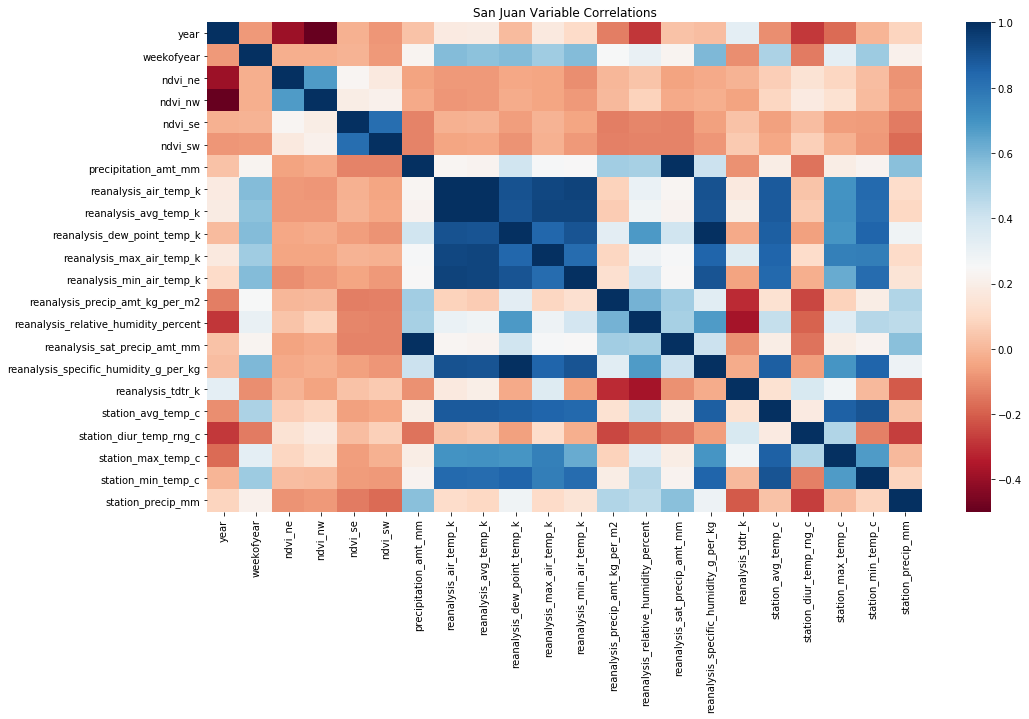

In [11]:
sns.heatmap(sj.corr(), cmap='RdBu')
plt.title('San Juan Variable Correlations')

Text(0.5, 1, 'Iquitos Variable Correlations')

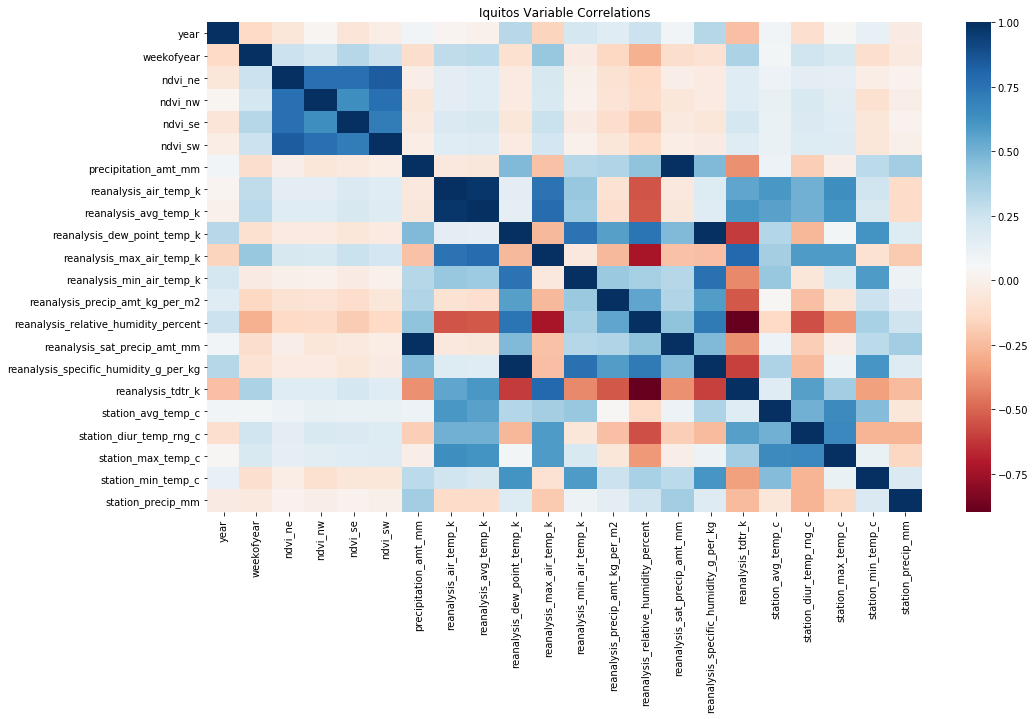

In [13]:
sns.heatmap(iq.corr(), cmap='RdBu')
plt.title('Iquitos Variable Correlations')

In [14]:
df = pd.concat([df_features,df_test])
df.isna().sum()

city                                       0
year                                       0
weekofyear                                 0
ndvi_ne                                  237
ndvi_nw                                   63
ndvi_se                                   23
ndvi_sw                                   23
precipitation_amt_mm                      15
reanalysis_air_temp_k                     12
reanalysis_avg_temp_k                     12
reanalysis_dew_point_temp_k               12
reanalysis_max_air_temp_k                 12
reanalysis_min_air_temp_k                 12
reanalysis_precip_amt_kg_per_m2           12
reanalysis_relative_humidity_percent      12
reanalysis_sat_precip_amt_mm              15
reanalysis_specific_humidity_g_per_kg     12
reanalysis_tdtr_k                         12
station_avg_temp_c                        55
station_diur_temp_rng_c                   55
station_max_temp_c                        23
station_min_temp_c                        23
station_pr

In [15]:
df[["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]] = df[["ndvi_ne","ndvi_nw","ndvi_se","ndvi_sw"]].fillna(method="ffill")

In [16]:
weather_analysis_cols = ["precipitation_amt_mm","reanalysis_air_temp_k","reanalysis_avg_temp_k","reanalysis_dew_point_temp_k",
"reanalysis_max_air_temp_k","reanalysis_min_air_temp_k","reanalysis_precip_amt_kg_per_m2","reanalysis_relative_humidity_percent",     
"reanalysis_sat_precip_amt_mm","reanalysis_specific_humidity_g_per_kg","reanalysis_tdtr_k","station_avg_temp_c",                       
"station_diur_temp_rng_c","station_max_temp_c","station_min_temp_c","station_precip_mm"]

In [17]:
df[weather_analysis_cols] = df[weather_analysis_cols].fillna(method="ffill")

In [18]:
weather_diff_cols = []
weather_rolling_cols = []

In [19]:
for i in weather_analysis_cols:
    df[i+"_diff"] = df[i].diff()
    weather_diff_cols.append(i+"_diff")
                        
df[weather_diff_cols] = df[weather_diff_cols].fillna(df[weather_diff_cols].mean())

for i in weather_analysis_cols:
    df[i+"_rolling"] = df[i].rolling(7).mean()
    weather_rolling_cols.append(i+"_rolling")
    
df[weather_rolling_cols] = df[weather_rolling_cols].fillna(df[weather_rolling_cols].mean())

In [21]:
df.head(20)

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_precip_amt_kg_per_m2_rolling,reanalysis_relative_humidity_percent_rolling,reanalysis_sat_precip_amt_mm_rolling,reanalysis_specific_humidity_g_per_kg_rolling,reanalysis_tdtr_k_rolling,station_avg_temp_c_rolling,station_diur_temp_rng_c_rolling,station_max_temp_c_rolling,station_min_temp_c_rolling,station_precip_mm_rolling
week_start_date,,,,,,,,,,,,,,,,,,,,,
1990-04-30,sj,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,40.570116,82.232998,44.035077,16.786560,4.943105,27.220833,8.027794,32.463405,22.160106,38.049181
1990-05-07,sj,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,40.570116,82.232998,44.035077,16.786560,4.943105,27.220833,8.027794,32.463405,22.160106,38.049181
1990-05-14,sj,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,40.570116,82.232998,44.035077,16.786560,4.943105,27.220833,8.027794,32.463405,22.160106,38.049181
1990-05-21,sj,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,40.570116,82.232998,44.035077,16.786560,4.943105,27.220833,8.027794,32.463405,22.160106,38.049181
1990-05-28,sj,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,40.570116,82.232998,44.035077,16.786560,4.943105,27.220833,8.027794,32.463405,22.160106,38.049181
1990-06-04,sj,1990,23,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,...,40.570116,82.232998,44.035077,16.786560,4.943105,27.220833,8.027794,32.463405,22.160106,38.049181
1990-06-11,sj,1990,24,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,...,23.890000,79.353673,15.102857,16.366327,2.412245,27.259184,7.087755,32.600000,22.771429,20.657143
1990-06-18,sj,1990,25,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,...,23.604286,80.783673,34.917143,16.932653,2.261224,27.677551,7.200000,33.242857,23.171429,21.385714
1990-06-25,sj,1990,26,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,...,26.400000,81.555102,34.417143,17.277959,2.191837,27.908163,7.344898,33.557143,23.257143,23.171429


In [22]:
df_test = df.iloc[1456:]    
df_features = df.iloc[:1456]

In [23]:
X = df_features.iloc[:, 3:]
X_val = df_test.iloc[:, 3:]
y = df_labels.iloc[:, -1]

In [24]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X = st.fit_transform(X)
X_val = st.transform(X_val)

In [25]:
from xgboost import XGBRegressor

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='weight', learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=10000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [26]:
parameters = {"booster":["gdtree","gblinear"],"n_estimators":[100,500,1000,10000],"learning_rate":[0.1,0.01,0.001],"importance_type":["gain","weight"]}

In [27]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(model,parameters,scoring="neg_mean_absolute_error",n_jobs=-1,cv=10)

clf.fit(X,y)

best_param = clf.best_params_
best_score = clf.best_score_

[22:43:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
best_param

{'booster': 'gblinear',
 'importance_type': 'gain',
 'learning_rate': 0.01,
 'n_estimators': 100}

In [29]:
best_score

-19.69804530763491

In [30]:
model = XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [31]:
model.fit(X, y)
y_pred = model.predict(X_val)
y_pred = y_pred.astype(int)

[22:45:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [32]:
output = pd.DataFrame({"city":df_test.city,"year":df_test.year,"weekofyear":df_test.weekofyear,"total_cases":y_pred})

output.reset_index(drop=True,inplace=True)

output.to_csv("sub.csv",index=False)

## This Model got a score of 26.1346 